In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
def datafile_load():
    data_file = 'aircrahesFullDataUpdated_2024.csv'
    df = pd.read_csv(data_file)
    return df

In [186]:
df = datafile_load()

In [187]:
df.head(10)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12
5,1960,Qtr 2,April,14,'-,Douglas,Douglas DC 4?,Taipei -,Force Air Thai Royal,0,18,18
6,2024,Qtr 2,April,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,0,2,2
7,1958,Qtr 2,April,21,10,Douglas,Douglas DC 7 / F,Near Sloan 10,Nevada Vegas Las of SW miles United Air L...,0,49,49
8,1997,Qtr 2,April,23,Afghanistan,Antonov,Antonov AN 26?,Near Konduz Afghanistan,Force Air Republican Afghan - Military,0,36,36
9,1988,Qtr 2,April,10,Afghanistan,Antonov,Antonov AN 26?,Near Mazâr-e Charif Afghanistan,Force Air Republican Afghan - Military,0,29,29


# Understanding the dataset
This process helps me understand the dataset so as to know how to approach the cleaning and analysis.

In [188]:
# Display the number of rows and columns in the dataset
df.shape

(5035, 12)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [190]:
# list the columns in the dataset
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [191]:
# check the total number of null values in the Country/Region column
df['Country/Region'].isna().sum()

230

In [192]:
# check the total number of null values in the Operators column
df['Operator'].isna().sum()

234

### Checking the unique values in each relevant column

In [193]:
df['Location'].unique()

array(['Kainatu', 'Delhi', 'Near Basel', ...,
       'Near the Kwango River Zaire', 'Kindu Zaire', 'Ndola Zambia'],
      dtype=object)

In [194]:
df['Aircraft Manufacturer'].unique()

array(['de Havilland Canada', 'Douglas', 'Vickers Vanguard', 'Antonov',
       'Boeing', 'Airbus', 'Aero Commander', 'Britten', 'Cessna',
       'Cessna 208B Caravan', 'Hughes', 'McDonnell Douglas', 'Pilgrim',
       'Ilyushin', 'Cessna  208B Grand', 'Hawker Siddeley', 'HS', 'Avro',
       'Lockheed 14', 'Swearingen SA227AC Metroliner', 'Yakovlev',
       'Curtiss', 'Mil', 'Convair', 'Consolidated', 'Doublas',
       'Embraer 110EJ Band./Embraer 110P', 'Learjet', 'NAMC',
       'Embraer/Piper', 'Lockheed 18', 'Cams', 'Ford', 'Grumman',
       'Lockheed', 'De Havilland', 'Mi', 'Pilatus', 'Sikorsky', '??',
       'Aérospatiale', 'Bell 212FAC',
       'Hadley Page 137Jetstream I / Cessna 206N11360 /', 'Canadair',
       'Bristol Britannia', 'Fokker', 'Junkers', 'Sud Aviation',
       'Vickers Viscount', 'Avro 685 York', 'Avro Shackleton',
       'Vickers 610 Viking', 'BAC Super', 'Aerocomp Comp Air',
       'Fairchild', 'Farman', 'Dornier', 'de Havilland  Canada',
       'Aviation Traders

In [195]:
df['Country/Region'].unique()

array([nan, "'-", ' Alaska', '10', 'Afghanistan', 'Aichi', 'Alaska',
       'Algeria', 'Angola', 'Argentina', 'Australia', 'Azerbaijan',
       'Bahamas', 'Bali', 'Belgian', 'Black', 'Bolivia', 'Botswana',
       'Brazil', 'Brazil\tAmazonaves', 'British', 'Calabria',
       'California', 'Cameroon', 'Cameroons', 'Canada', 'Canary',
       'Channel', 'Chechnya', 'Chile', 'China', 'China?', 'Colombia',
       'Colorado', 'Congo', 'Croatia', 'Cyprus', 'Democratic', 'East',
       'Ecuador', 'England', 'Equatorial', 'Estonia', 'Ethiopia',
       'Finland', 'Florida', 'France', 'French', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Greenland', 'Guangxi', 'Guatemala',
       'Guyana', 'Hawaii', 'Honduras', 'Hong', 'Idaho', 'India',
       'India\tPawan', 'Indiana', 'Indonesia', 'Iowa', 'Iran', 'Iraq',
       'Ireland', 'Isle', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kansas',
       'Kenya', 'Laos', 'Libya', 'London', 'Madagascar', 'Malta',
       'Mexico', 'Michigan', 'Moldova'

In [196]:
df['Aircraft'].unique()

array(['de Havilland Canada DHC 6 Twin Otter 100VH', 'Douglas DC 3VT',
       'Vickers Vanguard 952G AXOP', ...,
       'Handley Page Dart Herald 2029Q CAH', 'Lockheed Hercules C 1309T',
       'Douglas DC 6BSE'], dtype=object)

### Renaming the columns in the dataset

In [197]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [198]:
# rename all columns in the dataset 
df = df.rename({'Year': 'year', 
                'Quarter': 'quarter', 
                'Month': 'month', 
                'Day': 'day', 
                'Country/Region': 'country/region',
                'Aircraft Manufacturer':'aircraft manufacturer', 
                'Aircraft': 'aircraft', 
                'Location': 'location', 
                'Operator': 'operator', 
                'Ground': 'ground',
                'Fatalities (air)' :'fatalities (air)', 
                'Aboard' : 'aboard'},axis=1
              )

In [199]:
df.columns

Index(['year', 'quarter', 'month', 'day', 'country/region',
       'aircraft manufacturer', 'aircraft', 'location', 'operator', 'ground',
       'fatalities (air)', 'aboard'],
      dtype='object')

## Data Cleaning

In [200]:
df.head(5)

,year,quarter,month,day,country/region,aircraft manufacturer,aircraft,location,operator,ground,fatalities (air),aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


### 1. Cleaning the country/region column

In [201]:
# Replaces characters with values and empty string
df['country/region'] = df['country/region'].str.replace('N/A', 'Other Places').str.replace('?', '').str.replace("'-",'Other Places')

In [202]:
# Replace NaN with Other places
df['country/region'] = df['country/region'].fillna('Other Places', inplace=False)

In [203]:
df['country/region'].head(10)

0    Other Places
1    Other Places
2    Other Places
3    Other Places
4    Other Places
5    Other Places
6          Alaska
7              10
8     Afghanistan
9     Afghanistan
Name: country/region, dtype: object

### 2. Cleaning the aircraft manufacturer column

In [204]:
# Replaces all characters with values and empty string as applicable
df['aircraft manufacturer'] = df['aircraft manufacturer'].str.replace('N/A', 'Other manufacturer').str.replace('?', '').str.replace('+', '')

In [205]:
# Replace NaN with Other manufacturer
df['aircraft manufacturer'] = df['aircraft manufacturer'].fillna('Other manufacturer', inplace=False)

In [206]:
df['aircraft manufacturer'].head(10)

0    de Havilland Canada
1                Douglas
2       Vickers Vanguard
3                Antonov
4                Douglas
5                Douglas
6                Douglas
7                Douglas
8                Antonov
9                Antonov
Name: aircraft manufacturer, dtype: object

### 3. Cleaning the aircraft column

In [207]:
# Replace N/A with Other Aircraft
# Replace question mark with an empty string
df['aircraft'] = df['aircraft'].str.replace('N/A', 'Other Aircraft').str.replace('?', '')

In [208]:
# Replace NaN with Other Aircraft
df['aircraft'] = df['aircraft'].fillna('Other Aircraft', inplace=False)

In [209]:
df['aircraft'].head(10)

0    de Havilland Canada DHC 6 Twin Otter 100VH
1                                Douglas DC 3VT
2                    Vickers Vanguard 952G AXOP
3                                Antonov AN 8TL
4                           Douglas C 47A FZ559
5                                  Douglas DC 4
6                Douglas C-54D Skymaster N3054V
7                              Douglas DC 7 / F
8                                 Antonov AN 26
9                                 Antonov AN 26
Name: aircraft, dtype: object

### 4. Cleaning the location column

In [210]:
# Replace question mark with an empty string
df['location'] = df['location'].str.replace('?', '')

In [211]:
# Replace NaN with Others
df['location'] = df['location'].fillna('Others', inplace=False)

In [212]:
df['location'].head(10)

0                            Kainatu
1                              Delhi
2                         Near Basel
3                            Pepa  -
4                      Pindi-Khut  -
5                           Taipei -
6                     Near Fairbanks
7                      Near Sloan 10
8            Near Konduz Afghanistan
9    Near Mazâr-e Charif Afghanistan
Name: location, dtype: object

### 5. Cleaning the operator column

In [213]:
# Replace question mark with an empty string
# Replace N/A with 'Other operator'
# Trim white spaces
df['operator'] = df['operator'].str.replace('?', '').str.replace('N/A', 'Other operator').str.strip()

In [214]:
# Replace NaN with Other operator
df['operator'] = df['operator'].fillna('Other operator', inplace=False)

In [215]:
df['operator'].head(10)

0                   Airlines Australia GuineaTrans New
1                                  Airways IndiaDeccan
2       (UK) Airlines International SwitzerlandInvicta
3                               Airlines Centrafricain
4                                      Force Air Royal
5                                 Force Air Thai Royal
6                                      Alaska Air Fuel
7    Nevada      Vegas Las of SW miles United Air L...
8               Force Air Republican Afghan - Military
9               Force Air Republican Afghan - Military
Name: operator, dtype: object

In [216]:
df.info() # This shows that all issues in the dataset have been attended to

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   5035 non-null   int64 
 1   quarter                5035 non-null   object
 2   month                  5035 non-null   object
 3   day                    5035 non-null   int64 
 4   country/region         5035 non-null   object
 5   aircraft manufacturer  5035 non-null   object
 6   aircraft               5035 non-null   object
 7   location               5035 non-null   object
 8   operator               5035 non-null   object
 9   ground                 5035 non-null   int64 
 10  fatalities (air)       5035 non-null   int64 
 11  aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [217]:
df.isna().sum() # This shows that there is NaN values anymore in the dataset

year                     0
quarter                  0
month                    0
day                      0
country/region           0
aircraft manufacturer    0
aircraft                 0
location                 0
operator                 0
ground                   0
fatalities (air)         0
aboard                   0
dtype: int64

In [218]:
df.head()

,year,quarter,month,day,country/region,aircraft manufacturer,aircraft,location,operator,ground,fatalities (air),aboard
0,1970,Qtr 2,April,28,Other Places,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,Other Places,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,Other Places,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,Other Places,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,Other Places,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


# RESEARCH QUESTIONS

1. What is the trend in the number of aircraft crashes over the years?
2. What is the average number of fatalities on the ground?
3. What is the average Number of fatalities on the aircraft?
4. What is the average number of people aboard the aircraft?
5. How do fatalities vary across different aircraft manufacturers? Display top 10.
6. What is the relationship between the number of people aboard and the number of air fatalities?


# Findings

### 1. What is the trend in the number of aircraft crashes over the years?

In [219]:
crashes_per_year = df.groupby('year')['fatalities (air)'].count()

In [220]:
crashes_per_year

year
1908    1
1909    1
1912    1
1913    3
1915    2
       ..
2020    8
2021    9
2022    6
2023    2
2024    5
Name: fatalities (air), Length: 114, dtype: int64

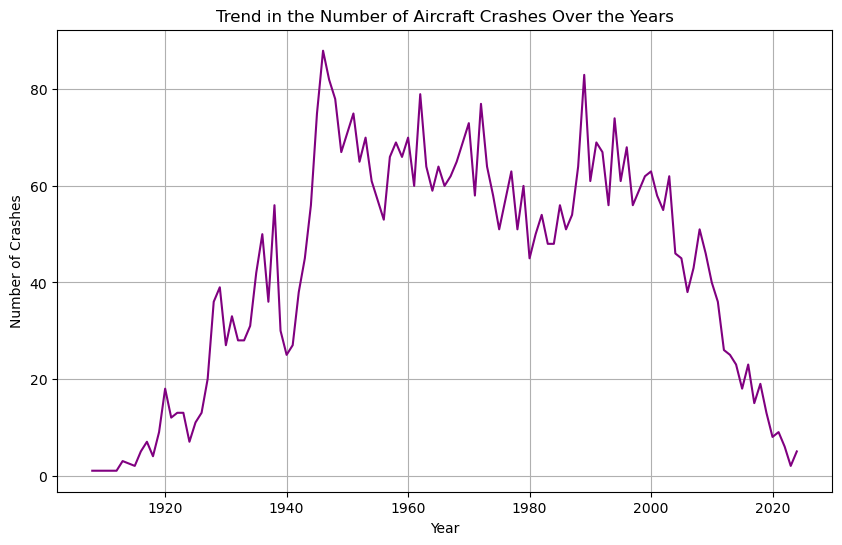

In [230]:
# generates a line chart visualization
plt.figure(figsize=(10, 6))
crashes_per_year.plot(x='year', y = 'fatalities (air)', color='purple')
plt.title('Trend in the Number of Aircraft Crashes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

### 2. What is the average number of fatalities on the ground?

In [222]:
Avg_ground_fatalities = df['ground'].mean()
Avg_ground_fatalities

1.7044687189672294

### 3. What is the average Number of fatalities on the aircraft?

In [223]:
Avg_air_fatalities = df['fatalities (air)'].mean()
Avg_air_fatalities

22.2188679245283

### 4. What is the average number of people aboard the aircraft?

In [224]:
Avg_no_aboard = df['aboard'].mean()
Avg_no_aboard

31.107249255213507

### 5. How do fatalities vary across different aircraft manufacturers? Display top 10

In [225]:
# Group by manufacturer and sum the fatalities (air)
fatalities_per_manufacturer = df.groupby('aircraft manufacturer')['fatalities (air)'].count().reset_index()

In [226]:
# Sort by the number of fatalities(air) in descending order
top_10_manufacturers = fatalities_per_manufacturer.sort_values(by='fatalities (air)', ascending=False).head(10)

In [227]:
print(top_10_manufacturers)

    aircraft manufacturer  fatalities (air)
222               Douglas               994
107                Boeing               388
35                Antonov               284
366              Lockheed               211
615   de Havilland Canada               157
326              Ilyushin               138
417     McDonnell Douglas               126
266                Fokker               126
201               Curtiss               125
212          De Havilland               108


<Figure size 1000x600 with 0 Axes>

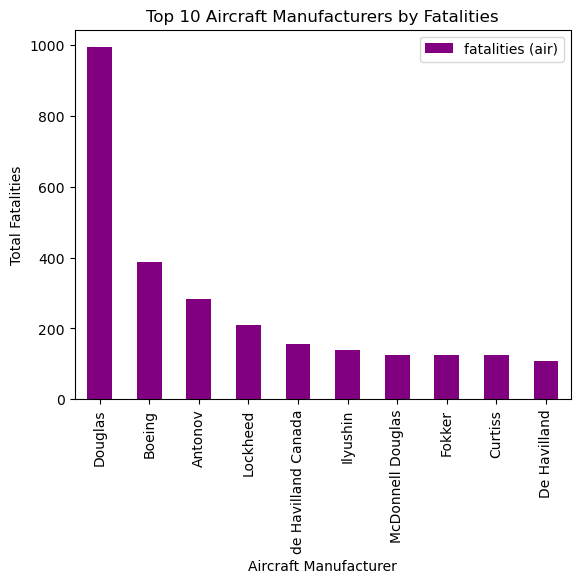

In [231]:
# generates a bar chart visualization
plt.figure(figsize=(10, 6))
top_10_manufacturers.plot.bar(x='aircraft manufacturer', y = 'fatalities (air)', color='purple')
plt.title('Top 10 Aircraft Manufacturers by Fatalities')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=90)
plt.show()

### 6. What is the relationship between the number of people aboard and the number of fatalities?

In [229]:
corr_coeff = df['aboard'].corr(df['fatalities (air)'])
print(f"Correlation btw aboard and air fatalities: {corr_coeff}")

Correlation btw aboard and air fatalities: 0.732485962431637


# Recommendation

Recommendation:

On the trends and patterns identified in the analysis above, aviation safety has improved over the years due to advancements in technology, regulations and safety procedures. Although certain period of years and aircraft manufacturers has show higher incidences of crashes and fatalities. The Analysis recommended that safety protocols are enhanced during quarters with high fatality, and manufacturers with track records of poor safety protocols should be closely monitored or reassessed. Also, higher fatality incidents are often linked to aircraft with larger passenger capacities, so stricter safety standards should be imposed on these models to mitigate future risks.